![A soccer pitch for an international match.](soccer-pitch.jpg)

In this notebook I'll try to answer one life's great questions:

> Are more goals scored in women's international soccer matches than men's?

Now that is of course written with a twinkle in the eye, nether the less, I think it's an interesting question to answer. Not least in the view of the rapid development of women's football in popularity and commercially in the recent years.  

Football is considered a low scoring game and if we assume that goals are an indicator of entertainment and excitement in a football match. Let's say someone is hesitating between watching a women's international match and a men's international match, and that person wants to watch the most entertaining match, then this question also serves a purpose.

Now let's have a look on how to approach this question. I'm working with two datasets containing the results of every official men's and women's international football match since the 19th century. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`. 

I've decided to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) from `2002-01-01` to `2022-12-31`.

I've decided to work with a **10% significance level**, and I use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu
import pingouin

# Loading in the two DataFrames
men_results = pd.read_csv('men_results.csv', parse_dates=['date'])
women_results = pd.read_csv('women_results.csv', parse_dates=['date'])

# Print the head of each DataFrame
print(men_results.head())
print(women_results.head())

   Unnamed: 0       date home_team away_team  home_score  away_score tournament
0           0 1872-11-30  Scotland   England           0           0   Friendly
1           1 1873-03-08   England  Scotland           4           2   Friendly
2           2 1874-03-07  Scotland   England           2           1   Friendly
3           3 1875-03-06   England  Scotland           2           2   Friendly
4           4 1876-03-04  Scotland   England           3           0   Friendly
   Unnamed: 0       date home_team  ... home_score  away_score        tournament
0           0 1969-11-01     Italy  ...          1           0              Euro
1           1 1969-11-01   Denmark  ...          4           3              Euro
2           2 1969-11-02   England  ...          2           0              Euro
3           3 1969-11-02     Italy  ...          3           1              Euro
4           4 1975-08-25  Thailand  ...          3           2  AFC Championship

[5 rows x 7 columns]


In the first code snippet the libraries that will be used for this project is imported. After that the two csv-files are loaded in as men_results and women_results. Then the head of both DataFrames are printed to confirm that they are correctly loaded in.
After that I'll do some exploratory data analysis of both the DataFrames to identify some of the general patterns of the data. This is done separately and in smaller snippets to have overview of the details in each step of the EDA.

In [2]:
# Determining the column names and data types of men_results
print(men_results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  44353 non-null  int64         
 1   date        44353 non-null  datetime64[ns]
 2   home_team   44353 non-null  object        
 3   away_team   44353 non-null  object        
 4   home_score  44353 non-null  int64         
 5   away_score  44353 non-null  int64         
 6   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.4+ MB
None


With the .info() method I'm getting the column names and their data types. It also gives the number of entries and shows how many non-null rows each column contains of, in this case there aren't any problems with nulls. I'll use the column names in the next snippet and the data types later on in the analysis. Here I'm just getting the confirmation that the date column is converted to at datetime data type when the csv-files are loaded in else I would have to do the conversion later on. 

In [3]:
# Determining the values of men_results' tournament column
print(men_results['tournament'].value_counts())

Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup                            964
                                        ...  
Real Madrid 75th Anniversary Cup            1
Évence Coppée Trophy                        1
Copa Confraternidad                         1
TIFOCO Tournament                           1
FIFA 75th Anniversary Cup                   1
Name: tournament, Length: 141, dtype: int64


In the snippet above I use the .value_counts() to the men_results['tournament'] column. I do this the get some knowledge about how much data there are related to the FIFA World Cup, this is the tournament I'm interested in for this analysis. After using the method, we learn that there are 964 rows of data in the tournament column that are marked as FIFA World Cup. We can also see that the column containing 141 different tournaments.
With that I'll move on and do some exploratory data analysis of the women_results df.

In [4]:
# Determining the column names and data types of women_results
print(women_results.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  4884 non-null   int64         
 1   date        4884 non-null   datetime64[ns]
 2   home_team   4884 non-null   object        
 3   away_team   4884 non-null   object        
 4   home_score  4884 non-null   int64         
 5   away_score  4884 non-null   int64         
 6   tournament  4884 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 267.2+ KB
None


As for the men_results df I'm using the .info() method on the women_results df. Neither here we have any problems with nulls. We can also see that the data type of the date column was correctly converted when the csv-file was loaded in. We can also see the the women_results df is considerably smaller than the men_results df with 4884 against 44353 rows for respectively women_results and men_results.

In [5]:
# Determining the values of women_results' tournament column
print(women_results['tournament'].value_counts())

UEFA Euro qualification                 1445
Algarve Cup                              551
FIFA World Cup                           284
AFC Championship                         268
Cyprus Cup                               258
African Championship qualification       226
UEFA Euro                                184
African Championship                     173
FIFA World Cup qualification             172
CONCACAF Gold Cup qualification          143
AFC Asian Cup qualification              141
Copa América                             131
Olympic Games                            130
CONCACAF Gold Cup                        126
Friendly                                 111
AFC Asian Cup                            111
Four Nations Tournament                  106
OFC Championship                          78
African Cup of Nations qualification      58
CONCACAF Championship                     42
SheBelieves Cup                           39
Euro                                      20
African Cu

When the .value_counts() method is used on the women_results['tournament'] column, as above, we get that only 284 rows are marked as FIFA World Cup matches. We can also see that the column only consists of 30 different tournaments. 
In the next couple of code snippets, I'll filter the data, so that it only includes official FIFA World Cup matches that took place after 2002-01-01. It is in this part of the analysis that it is important that the date column is converted to a datetime data type.

In [6]:
# Filtering for FIFA World Cup matches and matches after 2002-01-01 in the men_results df
men_fifa = men_results[(men_results['tournament'] == 'FIFA World Cup') & (men_results['date'] > '2002-01-01')]

# Printing the info and of the new df
print(men_fifa.info())
print(men_fifa.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 25164 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  384 non-null    int64         
 1   date        384 non-null    datetime64[ns]
 2   home_team   384 non-null    object        
 3   away_team   384 non-null    object        
 4   home_score  384 non-null    int64         
 5   away_score  384 non-null    int64         
 6   tournament  384 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 24.0+ KB
None
       Unnamed: 0       date  ... away_score      tournament
25164       25164 2002-05-31  ...          1  FIFA World Cup
25165       25165 2002-06-01  ...          0  FIFA World Cup
25166       25166 2002-06-01  ...          1  FIFA World Cup
25167       25167 2002-06-01  ...          2  FIFA World Cup
25168       25168 2002-06-02  ...          0  FIFA World Cup

[5 rows x 7 colu

After filtering the to DataFrames I'll again use the .info() methods to gain knowledge of how much each DataFrame is reduces in size. The 'new' men_fifa df only consists of 384 rows now and the 'new' women_fifa df only consists of 200 rows now. So after the filtering the two DataFrames resamples much more in size.

In [7]:
# Filtering for FIFA World Cup matches and matches after 2002-01-01 in the women_results df
women_fifa = women_results[(women_results['tournament'] == 'FIFA World Cup') & (women_results['date'] > '2002-01-01')]

# Printing the info and head of the new df
print(women_fifa.info())
print(women_fifa.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1600 to 4469
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  200 non-null    int64         
 1   date        200 non-null    datetime64[ns]
 2   home_team   200 non-null    object        
 3   away_team   200 non-null    object        
 4   home_score  200 non-null    int64         
 5   away_score  200 non-null    int64         
 6   tournament  200 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 12.5+ KB
None
      Unnamed: 0       date  ... away_score      tournament
1600        1600 2003-09-20  ...          3  FIFA World Cup
1601        1601 2003-09-20  ...          0  FIFA World Cup
1602        1602 2003-09-20  ...          1  FIFA World Cup
1603        1603 2003-09-20  ...          0  FIFA World Cup
1604        1604 2003-09-21  ...          1  FIFA World Cup

[5 rows x 7 columns]


Now I'll use EDA to determine the appropriate hypothesis test for data and scenario. In this case where I'm working with two independent groups, an unpaired two-sample test is required. Some examples of such tests are unpaired t-test and Wilcoxon-Mann-Whitney test. Whereas the first is a parametric test, meaning it should be used on data that is normally distributed. The Wilcoxon-Mann-Whitney test is a non-parametric version of the unpaired t-test, meaning it is used on data that isn't normally distributed.
So, to decide which test to use I'm creating a histogram of the total score per match, to see how the data is distributed. But first I'll have to create a new column of the total score in each df. I'm also creating a group column, will tell if the total score is from a men’s or women’s match, this is to be used when the test is performed later on in the analysis.

0.9266489744186401


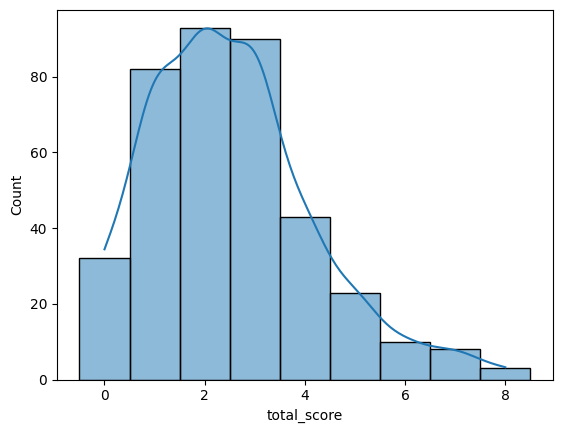

In [8]:
# Creating total score per match
men_fifa['total_score'] = men_fifa.home_score + men_fifa.away_score

# Creating the men group
men_fifa['group'] = 'men'

# Determining if the mens data is normally distributed with a histogram
sns.histplot(data=men_fifa, x='total_score', kde=True, discrete=True)

# Testing for normality
print(stats.shapiro(men_fifa['total_score']).statistic)

First let's have a look at the histogram for the men_fifa df. We see that the tail of the kde-curve is to the right of the plot, meaning that the distribution of the data is right skewed. The same goes for the distribution of the women_fifa df. So since or two distributions are skewed we should go with a non-parametric test, to test the hypothesis 'The mean number of goals scored in women's international football matches is the same as men's'. 
In these two cases there is no doubt that the distributions are right skewed, but sometime the histogram doesn't a clear answer. In such cases we can run a test of normality, so for the sake of the example, I have also showed how that is done. I've used the Shapiro-Wilk test, this test gives both a test statistic and a p-value. When N > 5000 the test statistics is accurate, while the p-value may not be, so therefore I've only printed the statistics, since or two distributions are respectively 384 and 200 entries.
When we look at the two plots our intuition tells us that the total_score of men's football matches resembles a normal distribution much more than the total_score of women's football matches. The outliers are simple further away from the center of mean of the distribution, just look at the tail of the kde-curve.
All these assumptions of the plots are also confirmed be the test statistics of the two distributions, which for the men's is roughly 0.93 and for the women's roughly 0.85. The test statistic must be close to 1, before we can say that the sample is drawn from a normal distribution.

0.8491013050079346


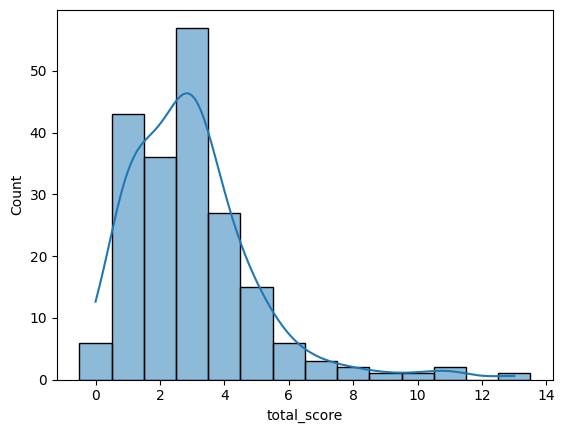

In [9]:
# Creating total score per match
women_fifa['total_score'] = women_fifa.home_score + women_fifa.away_score

# Creating the women group
women_fifa['group'] = 'women'

# Determining if the womens data is normally distributed with a histogram
sns.histplot(data=women_fifa, x='total_score', kde=True, discrete=True)

# Testing for normality
print(stats.shapiro(women_fifa['total_score']).statistic)

Now we can soon perform the hypothesis test. As mentioned before then we should use a non-parametric test. I'll use two different libraries to show how it can be done differently. The first test is a Wilcoxon-Mann-Whitney U test from the pingouin library. The second is same test but from the Scipy library.
To the use the first library I'll have to concatenate the two DataFrames. After that I'll subset the new DataFrame, before transforming it to wide format. And now we are ready to perform the hypothesis test.
I'll start with the pingouin.mwu test.

In [10]:
# Combining the two DataFrames
both = pd.concat([men_fifa, women_fifa], axis=0, ignore_index=True)

# Subsetting the new DataFrame
subset = both[['total_score', 'group']]

# Transforming the subset for the pingouin Mann-Whiney U t-test/Wilcoxon-Mann-Whitney test
subset_wide = subset.pivot(columns='group', values='total_score')

In [11]:
# Performing the right-tailed Wilcoxon-Mann-Witney test with pingouin
results_pg = pingouin.mwu(x=subset_wide['women'], y=subset_wide['men'], alternative='greater')

# Alternative performing the right-tailed Wilcoxon-Mann-Witney test with scipy
results_scipy = mannwhitneyu(x=women_fifa['total_score'], y=men_fifa['total_score'], alternative='greater')

As you can see then the approaches with the two libraries are slightly different. For the pingouin library I'm using the pivot table I created before whereas the scipy library uses a more common approach.

In [12]:
# Extracting the p-value as a float
p_val_1 = results_pg['p-val'].values[0]

# Determine hypothesis test result using significance level
if p_val_1 <= 0.01:
    result_1 = 'reject'
else:
    result_1 = 'fail to reject'
    
result_dict_1 = {'p_val': p_val_1, 'result': result_1}
print(result_dict_1)

{'p_val': 0.005106609825443641, 'result': 'reject'}


In [13]:
# Extracting the p-value as a float
p_val_2 = results_scipy.pvalue

# Determine hypothesis test result using significance level
if p_val_2 <= 0.01:
    result_2 = 'reject'
else:
    result_2 = 'fail to reject'
    
result_dict_2 = {'p_val': p_val_2, 'result': result_2}
print(result_dict_2)

{'p_val': 0.005106609825443641, 'result': 'reject'}


Let's have a look at the results. For the 'pengouin' test we get a p-value of 0.005 and the Null-hypothesis is hereby rejected. Luckily the 'scipy' test gets the exact same p-value and therefor also rejects the Null-hypothesis. This means that we're accepting the Alternative hypothesis saying: 'The mean number of goals scored in women's international soccer matches is greater than men's'. In other words, we can now answer initial question: 'Are more goals scored in women's international football matches than men's?'. And the answer is **Yes**, there is scored more goals in women's international football matches, at least for matches that took place between the 01-01-2002 and 31-12-2022.